# Steps in Data Analysis

## Step 1: Data Collection
Databases
Files - csv, excel
Apis, sensors, web scraping, surveys, etc.

## Step 2: Data Cleaning

## Step 3: Data Exploration

## Step 4: Data Visualization 

## Step 5: Insights & Decision Making

In [4]:
# Step 1 : Data collection
import pandas as pd 

# load dataset 
data = pd.read_csv("Titanic.csv")

In [5]:
# Display first 5 rows
print("First 5 rows of Dataset: ")
print(data.head())

First 5 rows of Dataset: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [6]:
# Basic Info
print("Dataset Info: ")
print(data.info())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# check shape and columns
print("Shape: ",data.shape)
print("Columns:",list(data.columns))

Shape:  (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
# Step 2: Data Cleaning

# Check for missing values
print("Missing Values per Column:")
print(data.isnull().sum())

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Fill missing Age with mean
data.fillna({'Age':data['Age'].mean()},inplace=True)

In [10]:
# Fill missing Embarked with mode 
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
# Drop Cabin column (too many missing values)
if 'Cabin' in data.columns:
    data.drop('Cabin',axis=1,inplace=True)
    print("Successfully dropped column.")

Successfully dropped column.


In [12]:
# drop duplicates
data.drop_duplicates(inplace=True)

In [13]:
# Confirm cleaning
print("After Cleaning: ")
print(data.isnull().sum())

After Cleaning: 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Step 3: Data Exploration

# Basic statistical summary
print("Summary Statistics: ")
print(data.describe())

Summary Statistics: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [15]:
# Survival counts
print("Survival Counts: ")
print(data['Survived'].value_counts())

Survival Counts: 
Survived
0    549
1    342
Name: count, dtype: int64


In [16]:
# Average survival rate by gender
print("Survival Rate by Gender: ")
print(data.groupby('Sex')['Survived'].mean())

Survival Rate by Gender: 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [17]:
# count survival value by gender
print("Survival value by Gender: ")
print(data.groupby('Sex')['Survived'].value_counts())

Survival value by Gender: 
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [18]:
# Average survival rate by passenger class
print("Survival Rate by Passenger Class: ")
print(data.groupby('Pclass')['Survived'].mean())

Survival Rate by Passenger Class: 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [19]:
# Correlation matrix
print("Correlation Matrix: ")
print(data.corr(numeric_only=True))

Correlation Matrix: 
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [21]:
# step 4:  Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set(style='whitegrid')

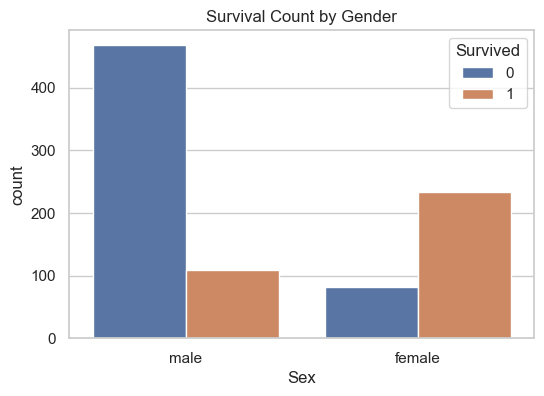

In [22]:
# gender vs survival
plt.figure(figsize=(6,4))
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title('Survival Count by Gender')
plt.show()

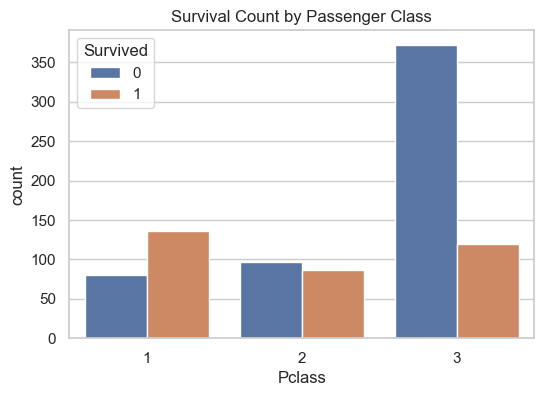

In [23]:
#Passenger class vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

C:\Users\91707\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


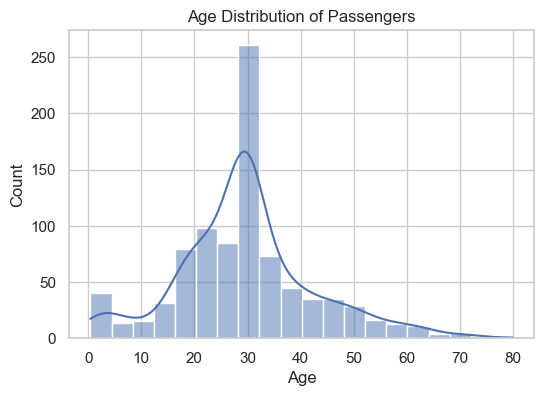

In [24]:
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(data['Age'],bins=20, kde = True)
plt.title('Age Distribution of Passengers')
plt.show()

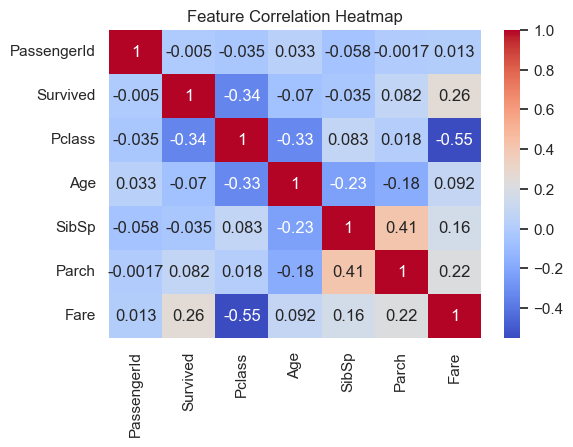

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [26]:
# Step 5: insights 

# compute key survival rates
gender_survival = data.groupby('Sex')['Survived'].mean()
class_survival = data.groupby('Pclass')['Survived'].mean()
age_mean = data['Age'].mean()

print('Insights: ')
print(f"Average age of Passengers: {age_mean:.2f} years.")
print(f"Female survival rate: {gender_survival['female']*100:.2f}%")
print(f"Male survival rate: {gender_survival['male']*100:.2f}%")
print(f"1st Class survival rate: {class_survival[1]*100:.2f}%")
print(f"3rd Class survival rate: {class_survival[3]*100:.2f}%")

Insights: 
Average age of Passengers: 29.70 years.
Female survival rate: 74.20%
Male survival rate: 18.89%
1st Class survival rate: 62.96%
3rd Class survival rate: 24.24%


In [27]:
print("Conclusion: ")
print("Women and children, especially in higher classes, had higher chances of survival.")
print("Passengers in 3rd Class had significantly lower survival rates.")

Conclusion: 
Women and children, especially in higher classes, had higher chances of survival.
Passengers in 3rd Class had significantly lower survival rates.
